# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [3]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=81a81f59edef26eac33fa8d62f7cd7435ecdcc2d246f8c1a4877844b95671907
  Stored in directory: c:\users\shake\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [6]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.8.0
Is using GPU? False


# Task 2: Preprocess Data

In [7]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Train whole set:")
print(x_train.shape, y_train.shape)
print("Test whole set:")
print(x_test.shape, y_test.shape)

x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)
print("Train subset:")
print(x_train.shape, y_train.shape)
print("Test subset:")
print(x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 415s 2us/step
Train whole set:
(50000, 32, 32, 3) (50000, 1)
Test whole set:
(10000, 32, 32, 3) (10000, 1)
Train subset:
(15000, 32, 32, 3) (15000, 3)
Test subset:
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

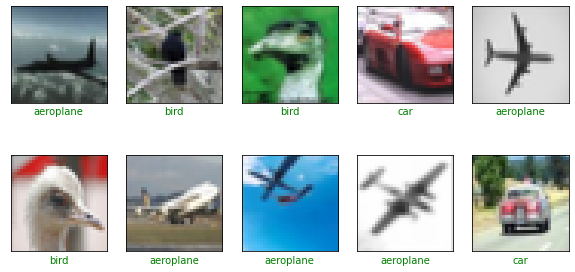

In [9]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()
    
show_random_examples(x_train, y_train, y_train)

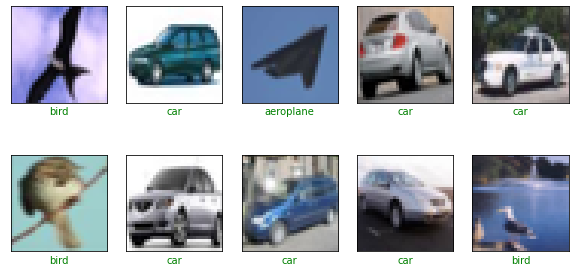

In [10]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model

    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32, 32,3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam', metrics=['accuracy']
    )
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

# Task 5: Train the Model

In [26]:
h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=20, batch_size=64,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_{val_accuracy:.3f}.h5',
            save_best_only=True, save_weights_only=False,
            monitor='val_accuracy'
        )
    ]
)

Epoch 1/20
235/235 [==============================] - 21s 90ms/step - loss: 0.2868 - accuracy: 0.8900 - val_loss: 0.2514 - val_accuracy: 0.9090
Epoch 2/20
235/235 [==============================] - 21s 89ms/step - loss: 0.2700 - accuracy: 0.8978 - val_loss: 0.6099 - val_accuracy: 0.8137
Epoch 3/20
235/235 [==============================] - 21s 88ms/step - loss: 0.2534 - accuracy: 0.9031 - val_loss: 0.2670 - val_accuracy: 0.9060
Epoch 4/20
235/235 [==============================] - 21s 88ms/step - loss: 0.2441 - accuracy: 0.9059 - val_loss: 0.3108 - val_accuracy: 0.8820
Epoch 5/20
235/235 [==============================] - 21s 88ms/step - loss: 0.2371 - accuracy: 0.9115 - val_loss: 0.2478 - val_accuracy: 0.9137
Epoch 6/20
235/235 [==============================] - 21s 88ms/step - loss: 0.2228 - accuracy: 0.9144 - val_loss: 0.2014 - val_accuracy: 0.9240
Epoch 7/20
235/235 [==============================] - 21s 88ms/step - loss: 0.2144 - accuracy: 0.9172 - val_loss: 0.3750 - val_accuracy:

# Task 6: Final Predictions

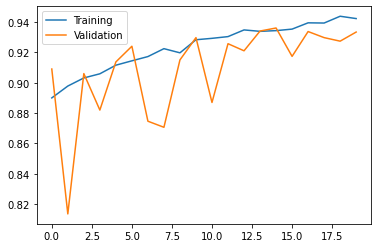

In [27]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()

In [28]:
model= tf.keras.models.load_model('models/model_0.936.h5')

In [29]:
preds = model.predict(x_test/255.)

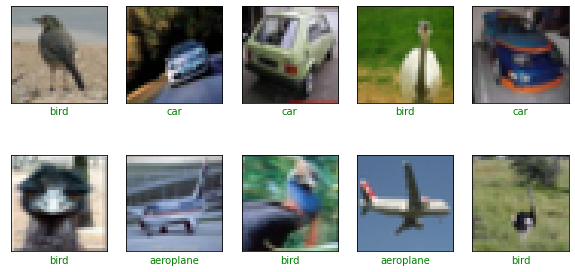

In [33]:
show_random_examples(x_test, y_test, preds)